In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'darkgrid', color_codes=True)

In [2]:
data = pd.read_excel('data.xlsx', sheet_name = 'All data')

In [3]:
data.head()

,EMPLID,Cognitive Ability Test,Situational Judgement Test,Personality Assessment,Performance,Graph
0,C2024769,10.0,5.0,5,8,NaN
1,C2013341,9.0,5.0,7,8,NaN
2,C2024348,9.0,6.0,5,8,NaN
3,C2001411,8.0,5.0,9,8,NaN
4,C2012695,8.0,5.0,7,6,NaN


In [4]:
data.shape

(200, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EMPLID                      200 non-null    object 
 1   Cognitive Ability Test      197 non-null    float64
 2   Situational Judgement Test  196 non-null    float64
 3   Personality Assessment      200 non-null    int64  
 4   Performance                 200 non-null    int64  
 5   Graph                       0 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB


In [6]:
data.Graph.isna().sum()

200

In [7]:
data = data.drop('Graph', 1)

In [8]:
data.head()

,EMPLID,Cognitive Ability Test,Situational Judgement Test,Personality Assessment,Performance
0,C2024769,10.0,5.0,5,8
1,C2013341,9.0,5.0,7,8
2,C2024348,9.0,6.0,5,8
3,C2001411,8.0,5.0,9,8
4,C2012695,8.0,5.0,7,6


In [9]:
data.isna().sum()

EMPLID                        0
Cognitive Ability Test        3
Situational Judgement Test    4
Personality Assessment        0
Performance                   0
dtype: int64

data['Cognitive Ability Test'].value_counts()

In [10]:
data['Cognitive Ability Test'].mean()

3.182741116751269

In [11]:
data.dropna(inplace = True)

In [12]:
data.shape

(193, 5)

### Filling Missing Values

In [13]:
data.isna().sum()

EMPLID                        0
Cognitive Ability Test        0
Situational Judgement Test    0
Personality Assessment        0
Performance                   0
dtype: int64

### Analysis

In [14]:
data.describe()

,Cognitive Ability Test,Situational Judgement Test,Personality Assessment,Performance
count,193.000000,193.000000,193.000000,193.000000
mean,3.207254,4.595855,6.777202,5.160622
std,2.071269,1.840625,1.375795,1.464903
min,1.000000,1.000000,1.000000,2.000000
25%,1.000000,3.000000,6.000000,4.000000
50%,3.000000,5.000000,7.000000,6.000000
75%,4.000000,6.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,8.000000


In [15]:
data.corr()['Performance']

Cognitive Ability Test        0.538264
Situational Judgement Test    0.557331
Personality Assessment        0.247848
Performance                   1.000000
Name: Performance, dtype: float64

In [16]:
print('Employees with all tests higher than 5')
for index, row in data.iterrows():
    if (row['Cognitive Ability Test'] > 5) and (row['Situational Judgement Test'] > 5) and (row['Personality Assessment'] > 5):
        print(index, row['EMPLID'], row['Performance'])

Employees with all tests higher than 5
7 C2003588 8
11 C2011249 8
12 C2012261 6
13 C2012283 8
18 C2001305 6
21 C2011809 6
22 C2011867 8
24 C2019203 8


## Linear Regression

In [17]:
data.columns

Index(['EMPLID', 'Cognitive Ability Test', 'Situational Judgement Test',
       'Personality Assessment', 'Performance'],
      dtype='object')

In [18]:
x = data[['Cognitive Ability Test', 'Situational Judgement Test', 'Personality Assessment']]
y = data['Performance']

In [19]:
model = sm.OLS(y, x).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Performance   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1824.
Date:                Sat, 01 May 2021   Prob (F-statistic):                   9.76e-140
Time:                        19:24:48   Log-Likelihood:                         -270.46
No. Observations:                 193   AIC:                                      546.9
Df Residuals:                     190   BIC:                                      556.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Cognitive Ability Test         0.3658      0.034     10.748      0.000       0.299       0.433
Situational Judgement Test     0.4345      0.037     11.617      0.000       0.361       0.508
Personality Assessment         0.2875      0.029      9.875      0.000       0.230       0.345
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.610
Skew:                          -0.083   Prob(JB):                        0.737
Kurtosis:                       3.220   Cond. No.                         5.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
data.columns

Index(['EMPLID', 'Cognitive Ability Test', 'Situational Judgement Test',
       'Personality Assessment', 'Performance'],
      dtype='object')

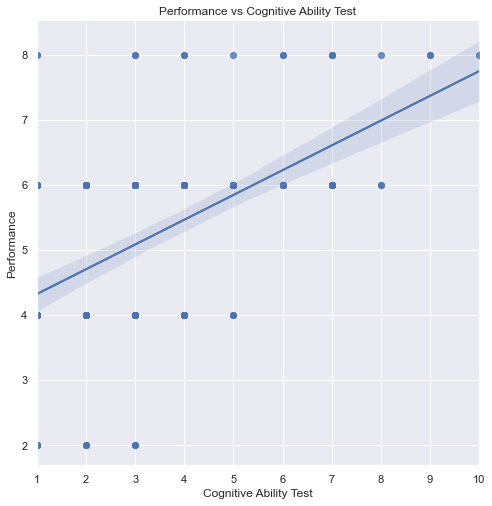

In [85]:
sns.lmplot(data = data, x="Performance", y="Cognitive Ability Test", height = 7)
plt.title('Performance vs Cognitive Ability Test')
plt.show()

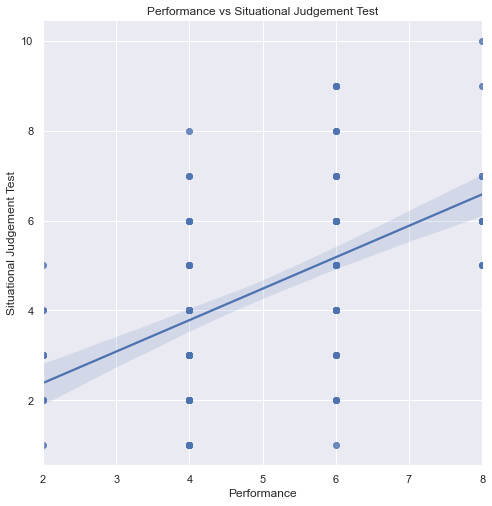

In [86]:
sns.lmplot(data = data, x="Performance", y="Situational Judgement Test", height = 7 )
plt.title('Performance vs Situational Judgement Test')
plt.show()

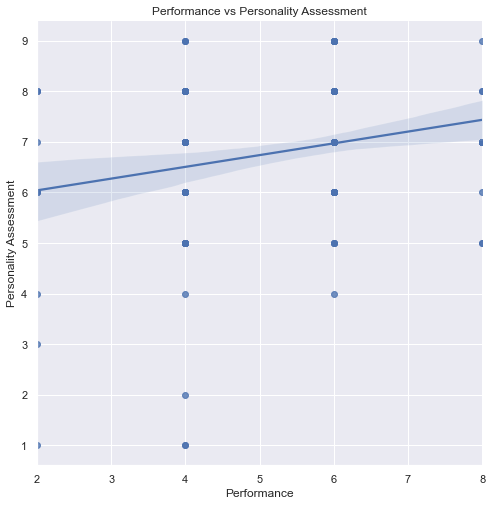

In [87]:
sns.lmplot(data=data, x="Performance", y="Personality Assessment" , height = 7)
plt.title('Performance vs Personality Assessment')
plt.show()